# Exercise 3 : Sequential Graph

In [12]:
from typing import TypedDict 
from langgraph.graph import StateGraph
from IPython.display import Image, display

In [13]:
class AgentState(TypedDict):
    name: str
    age: str
    skills : list
    res: str

In [14]:
def Greet(state:AgentState) -> AgentState:
    """This node will greet the user"""
    state["res"] = f"{state["name"]} welcome to the system!"
    return state

def GetAge(state:AgentState) -> AgentState:
    """This node will describe the user's age"""
    state["res"] = state["res"] + f" You are {state["age"]} years old!"
    return state


def ListSkills(state:AgentState) -> AgentState:
    """This node will list the user's skills in a formatted string"""
    state["res"] = state["res"] + f" You have skills in: {", ".join(state["skills"])}"
    return state

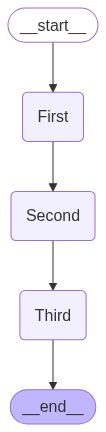

In [15]:
graph = StateGraph(AgentState)

graph.add_node("First", Greet)
graph.add_node("Second", GetAge)
graph.add_node("Third", ListSkills)

graph.set_entry_point("First")
graph.add_edge("First", "Second")
graph.add_edge("Second", "Third")
graph.set_finish_point("Third")
app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
res = app.invoke({"name": "Linda", "age": 31, "skills":["Python", "Machine Learning", "LangGraph"]})
res["res"]

'Linda welcome to the system! You are 31 years old! You have skills in: Python, Machine Learning, LangGraph'